# **Parkinson’s Disease Symptom Severity Prediction Model**

**Name:** Vandana K  
**Organization:** Entri Elevate  
**Date:** [Evaluation Date]

---

## **1. Overview of Problem Statement**
Parkinson’s disease is a progressive neurological disorder that affects movement and other functions.  
Predicting the severity of symptoms is essential for timely intervention and treatment.  
Using the Parkinson's Telemonitoring dataset, we aim to develop a machine learning model  
that predicts the **total UPDRS (Unified Parkinson's Disease Rating Scale)** score,  
a critical measure of symptom severity.

---

## **2. Objective**
To develop a robust prediction model for **total_UPDRS** using machine learning techniques.

---

## **3. Data Description**

- **Source:** UCI Machine Learning Reposi
- **Dataset:** Parkinson’s Telemonitoring dataset  
- **Target Variable:** total_UPDRS  

### **Features:**
- **Subject Information:** Subject ID  
- **Voice Measurements:**  
  - Jitter (%)  
  - Jitter (Abs)  
  - Shimmer  
  - HNR  
  - RPDE  
  - DFA  
  - PPE  
- **Signal Features:** Fundamental frequency measures (F0), amplitude variation measures, etc.  
- **Time:** Time since baseline recording.

---


## **Data Collection**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
import joblib

In [2]:
data  = pd.read_csv('parkinsons_updrs.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head(11)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
5,1,72,0,40.6520,29.435,36.870,0.00353,0.000023,0.00119,0.00159,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500
6,1,72,0,47.6490,29.682,37.363,0.00422,0.000024,0.00212,0.00221,...,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.17563
7,1,72,0,54.6400,29.928,37.857,0.00476,0.000025,0.00226,0.00259,...,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844
8,1,72,0,61.6690,30.177,38.353,0.00432,0.000029,0.00156,0.00207,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.20037
9,1,72,0,68.6880,30.424,38.849,0.00496,0.000027,0.00258,0.00253,...,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.20117


## **Data Preprocessing - Data Cleaning**

##### **Renaming Column**

In [5]:
df.rename(columns = {'subject#':'subject'}, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject        5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

##### **Checking For Null Values and Duplicates**

In [7]:
df.isnull().sum()

subject          0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,subject,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [10]:
df.shape

(5875, 22)

#### **Visualizing Outliers**

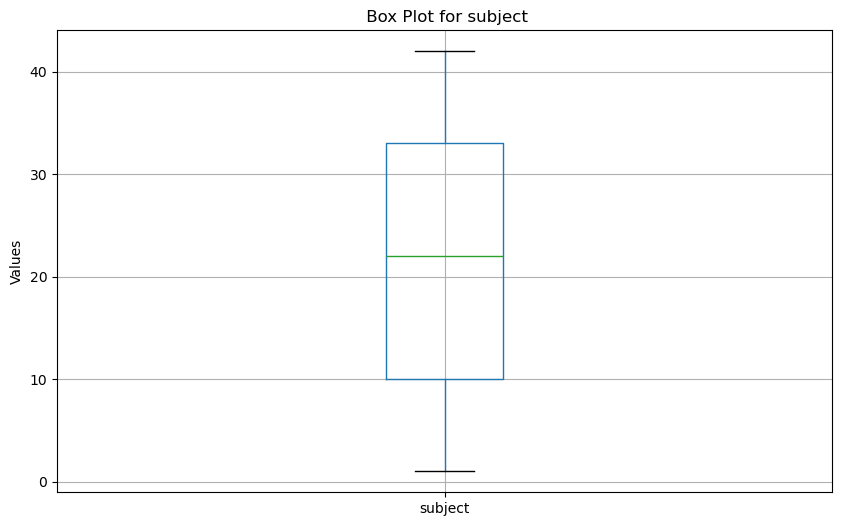

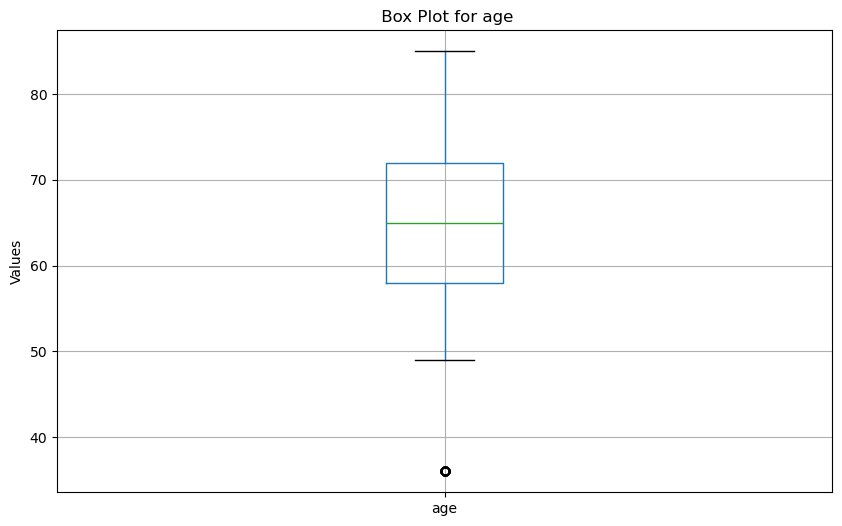

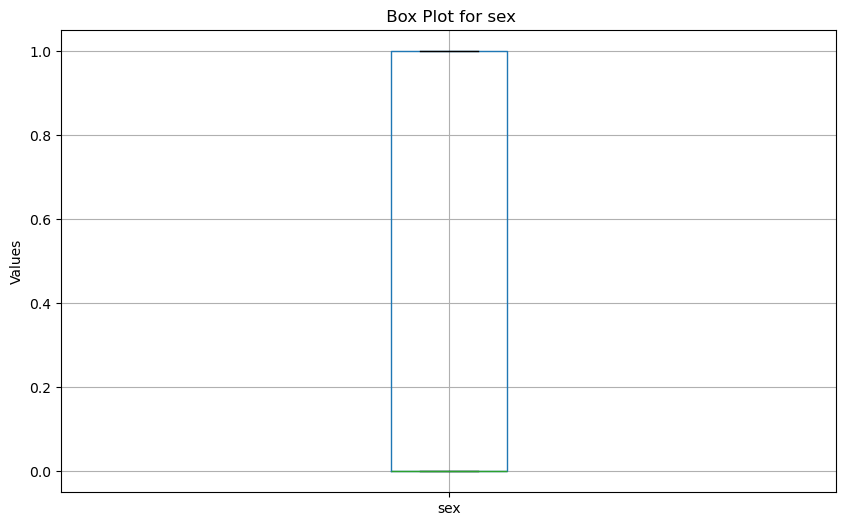

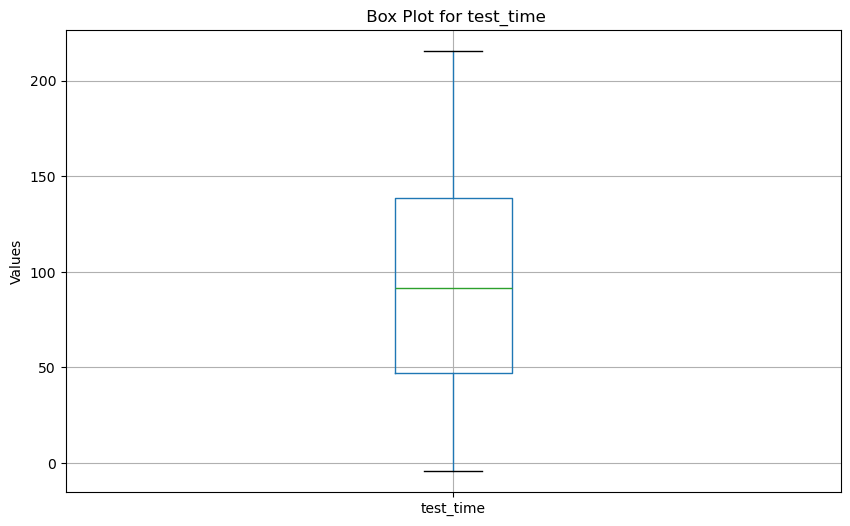

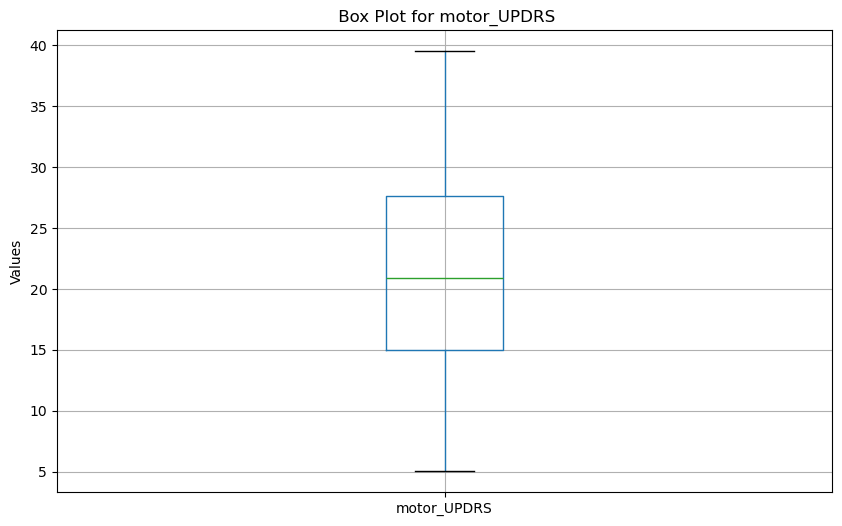

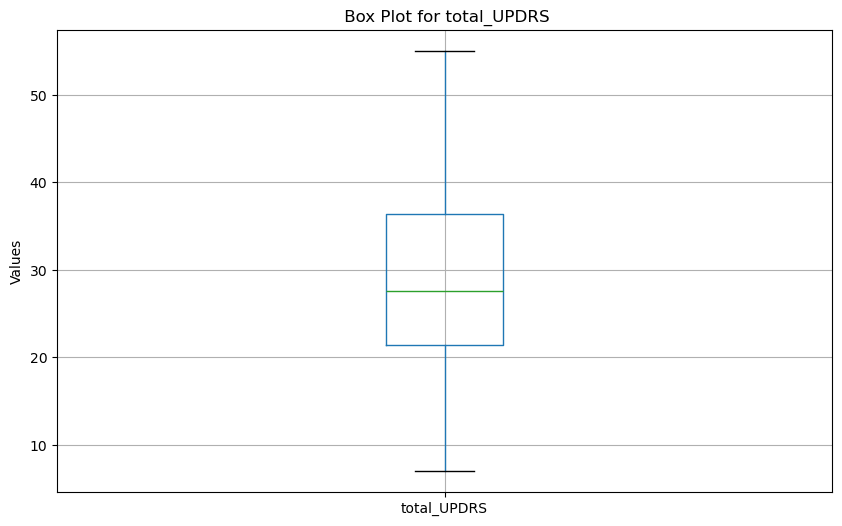

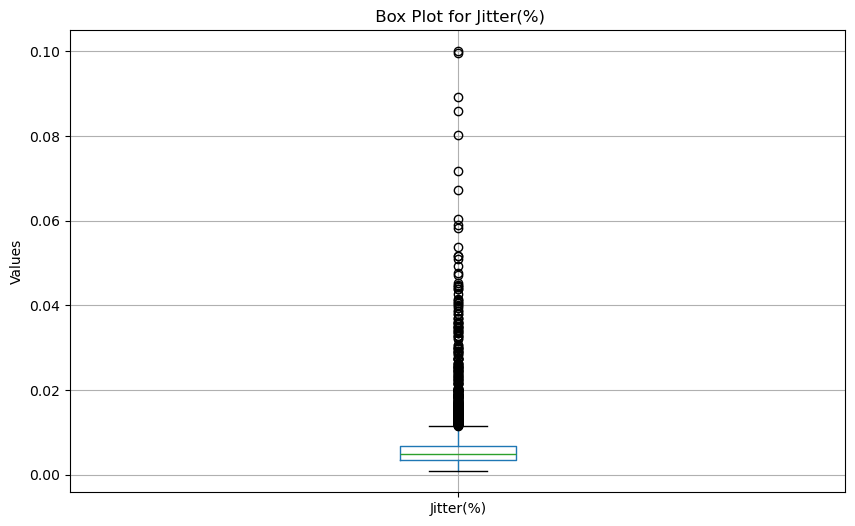

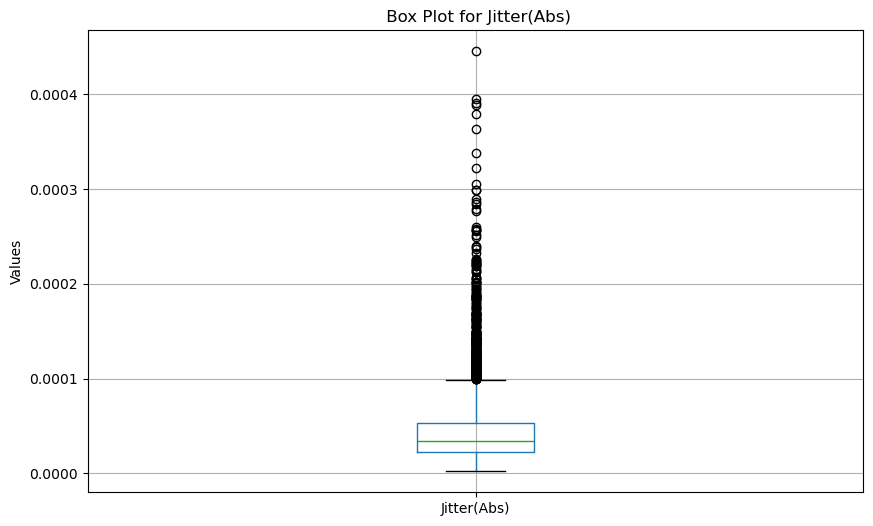

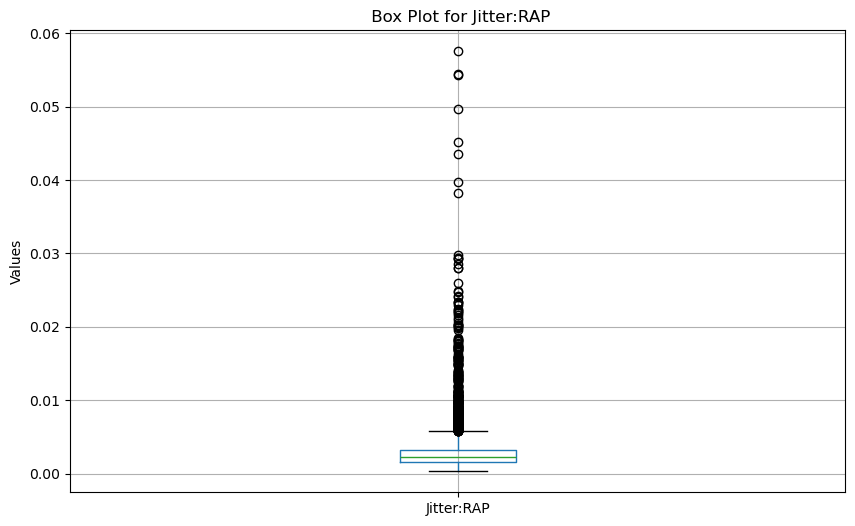

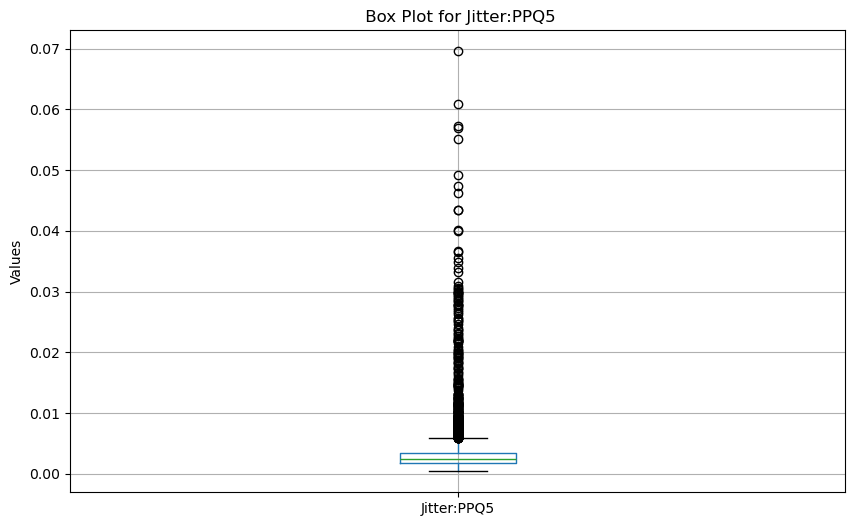

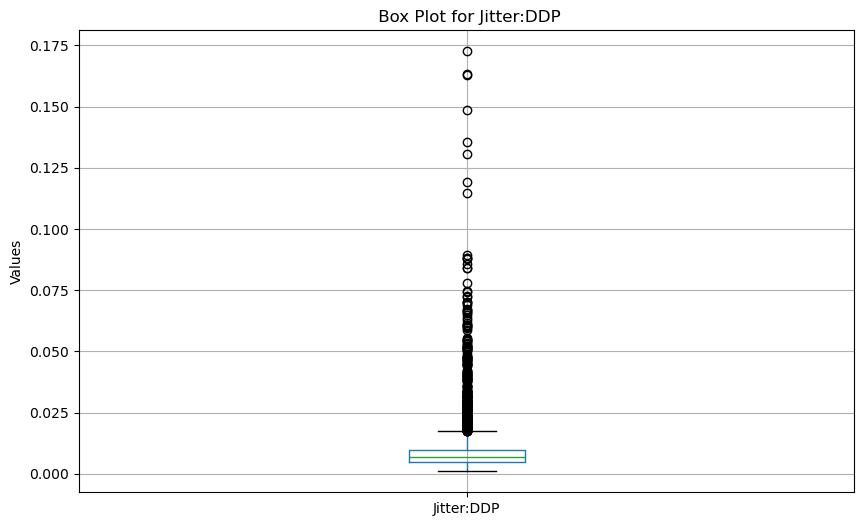

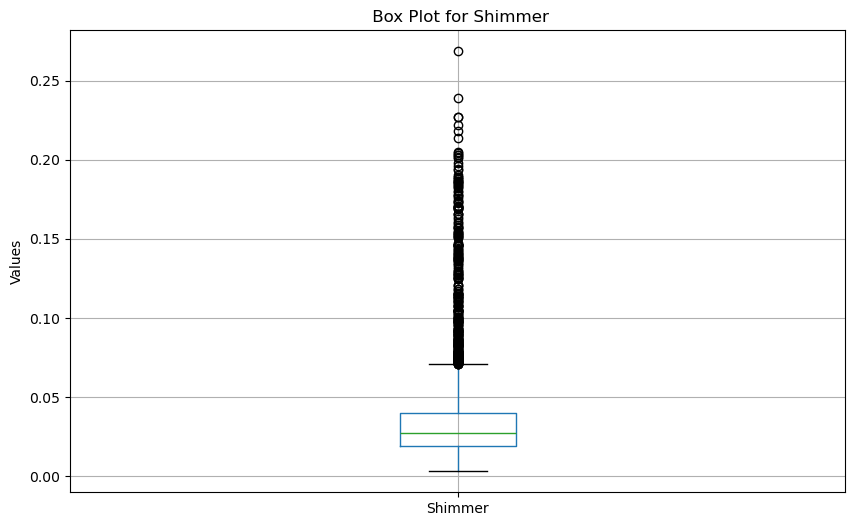

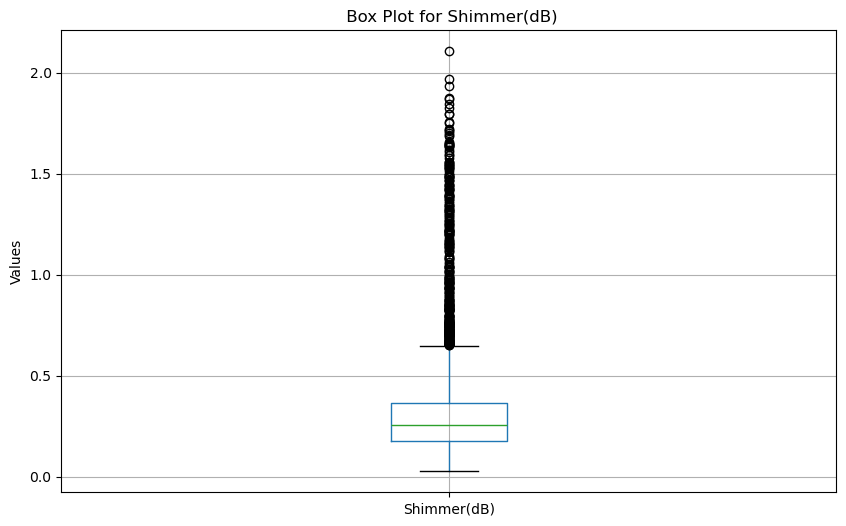

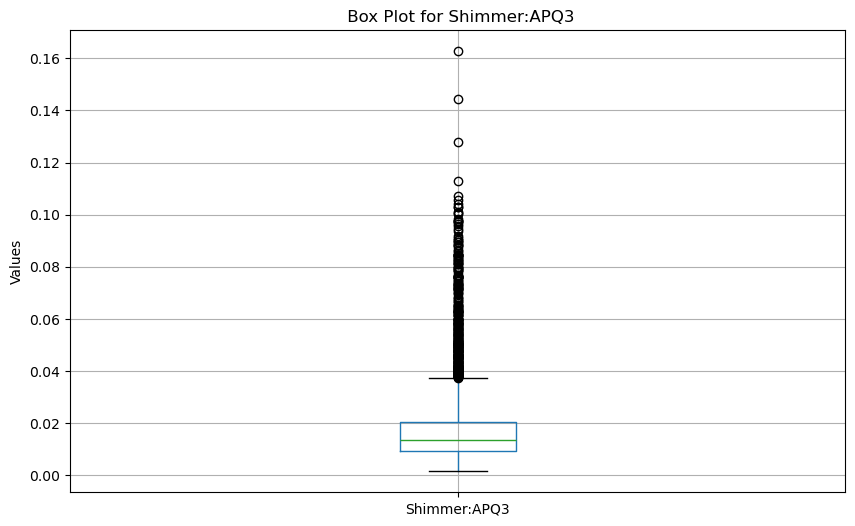

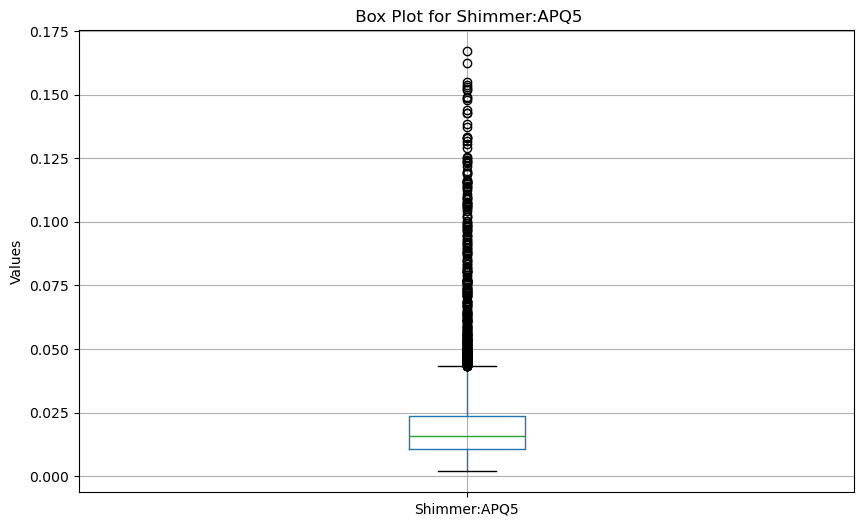

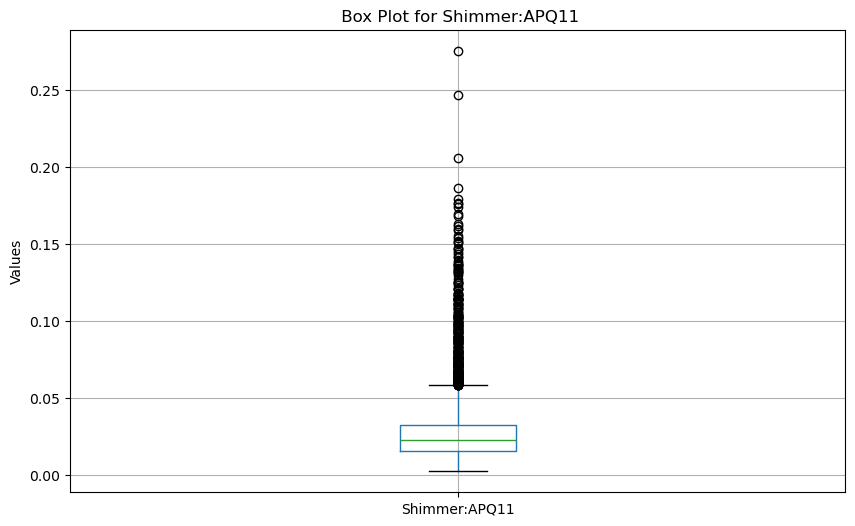

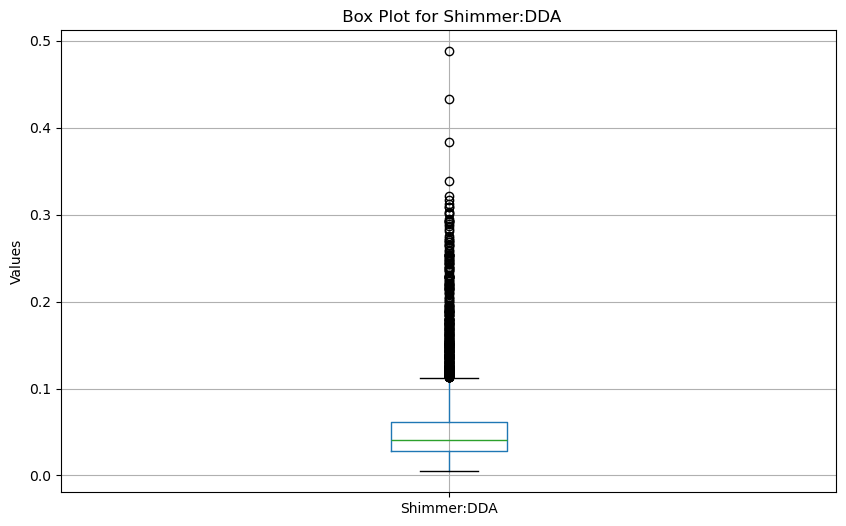

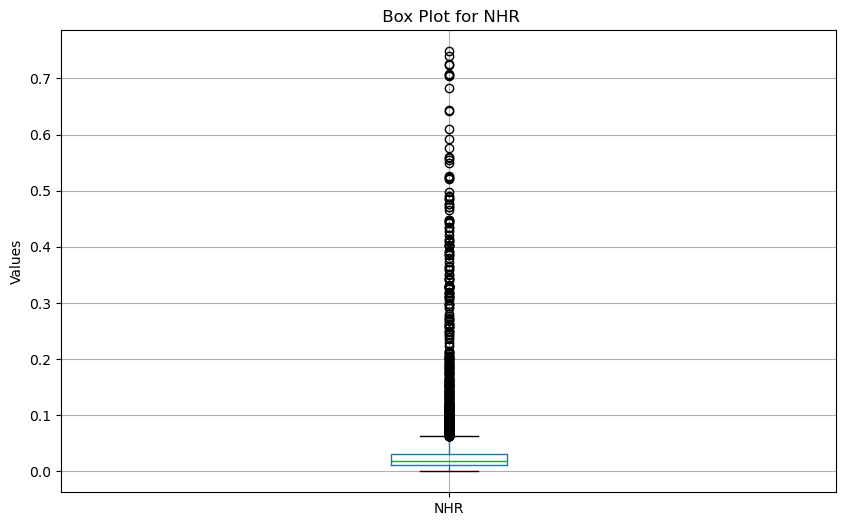

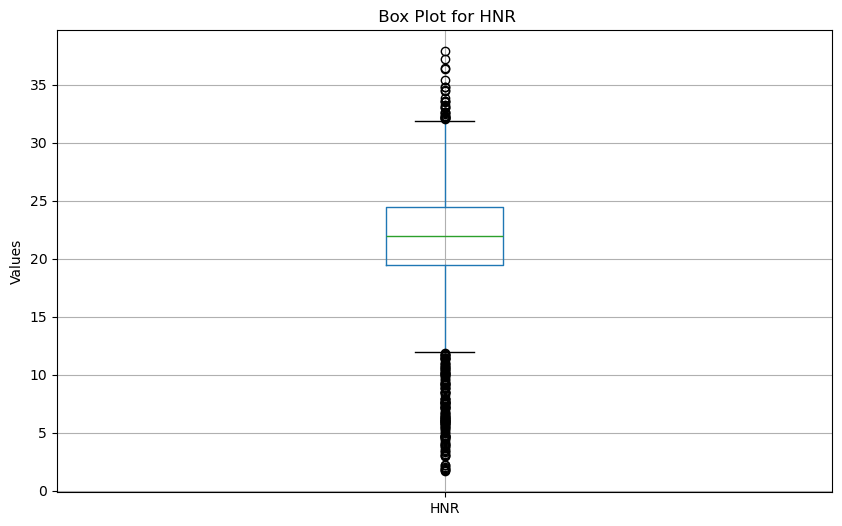

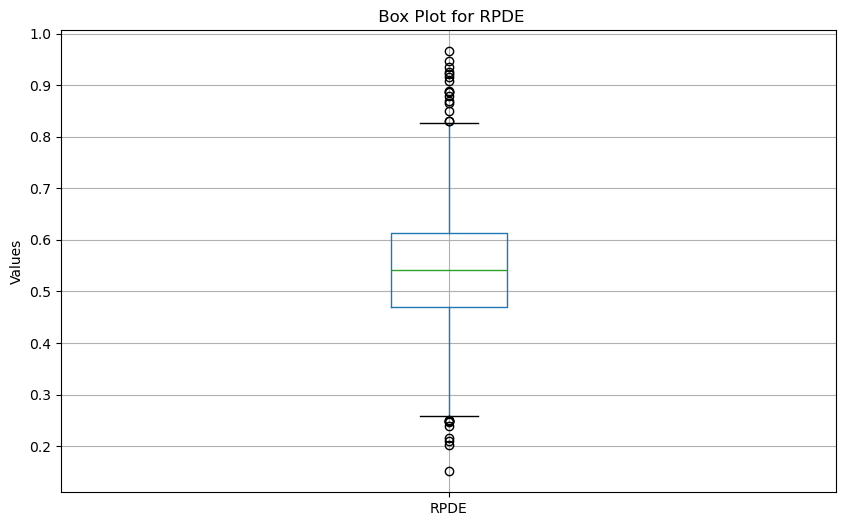

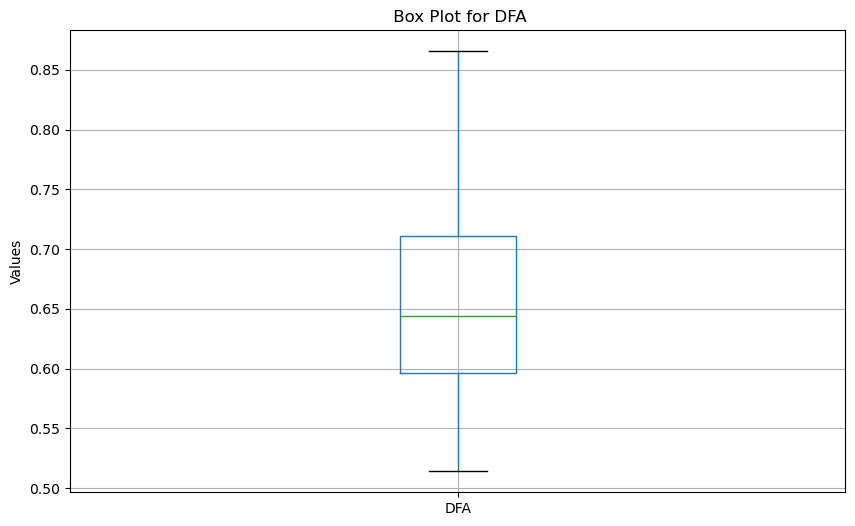

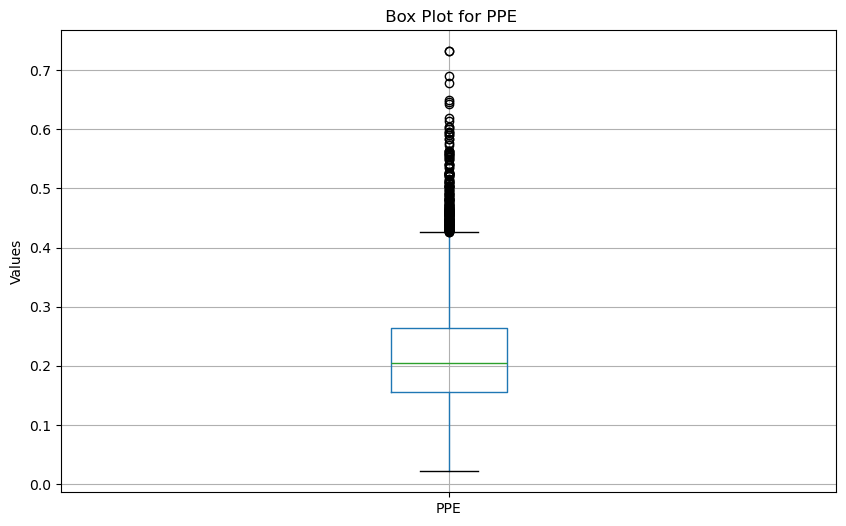

In [11]:
# Box Plot for visualize outliers
columns = df.select_dtypes(include = ['number'])

for col in columns.columns:
    plt.figure(figsize=(10,6))
    columns.boxplot(column = col)
    plt.title(f" Box Plot for {col}")
    plt.ylabel('Values')
    plt.show()

##### **Handling Outliers**

In [12]:
# Outlier's removel with IQR
def handle_outlier(df):
    for col in df.select_dtypes(include = ['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        lower = Q1 - 1.5 *IQR
        upper = Q3 + 1.5 *IQR

        df[col] = df[col].apply(lambda x: 
        lower if x<lower else 
        upper if x>upper else
        x)
    return df
df1 = handle_outlier(df)

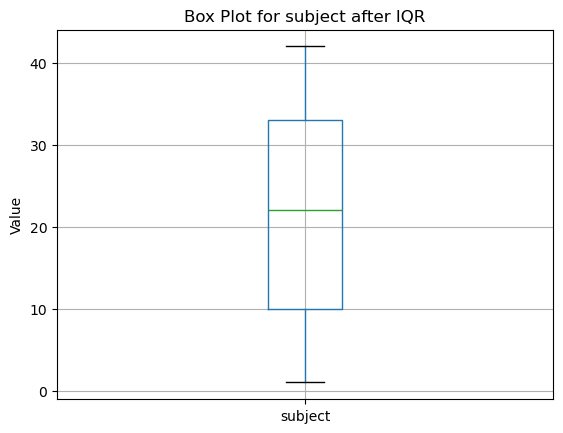

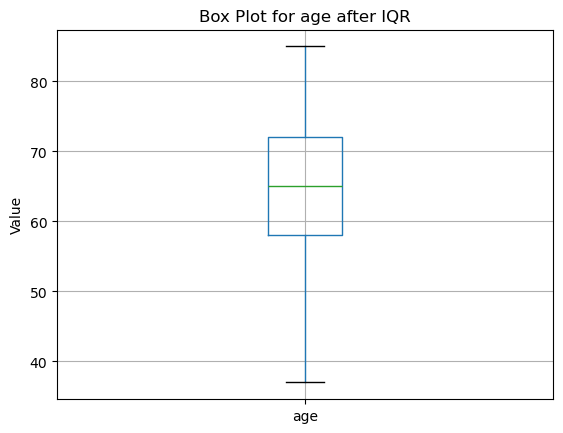

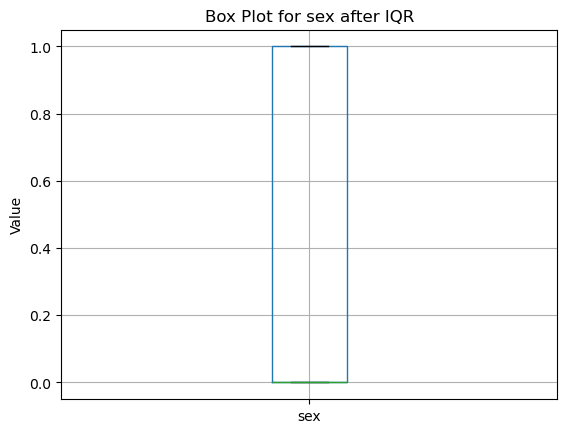

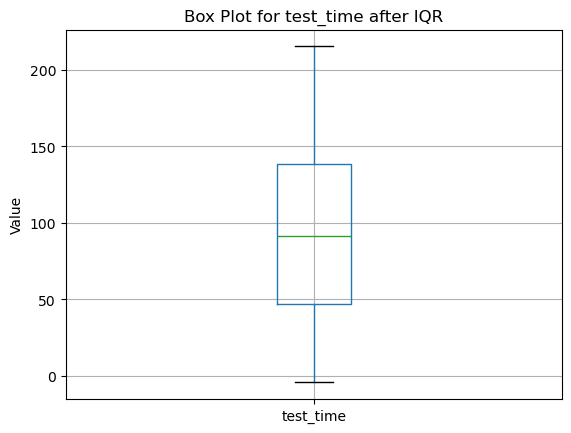

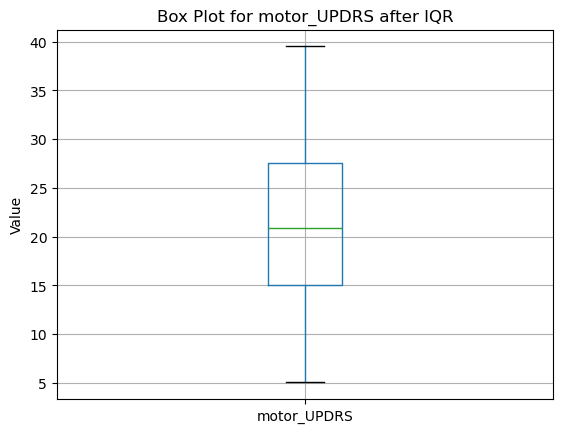

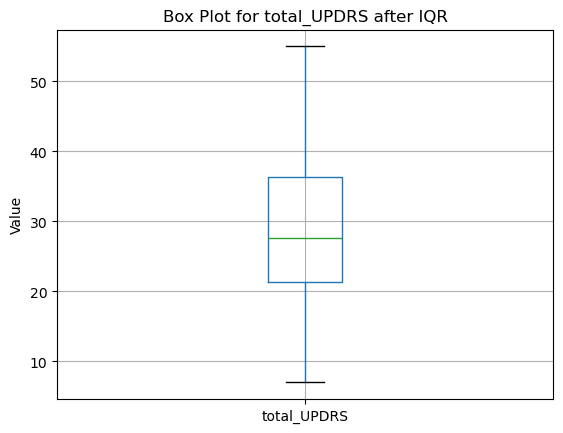

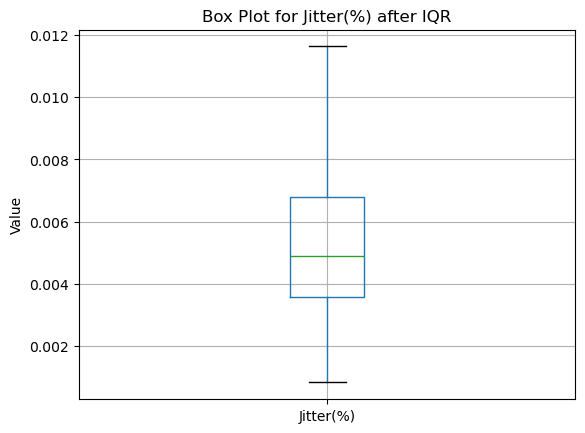

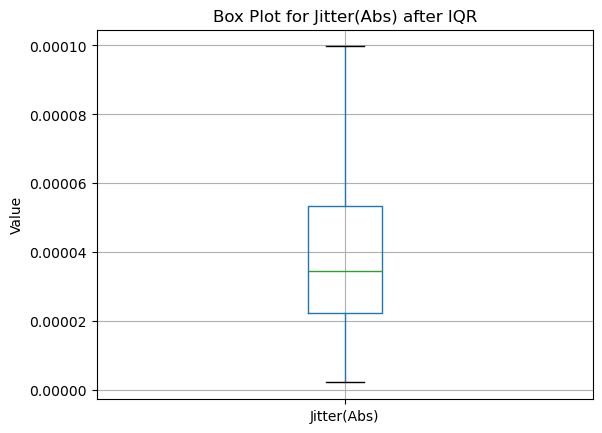

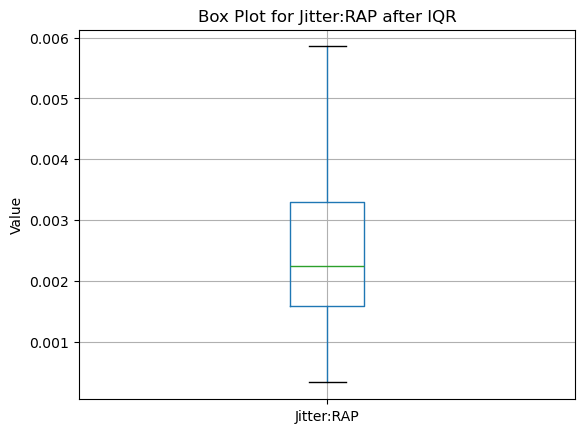

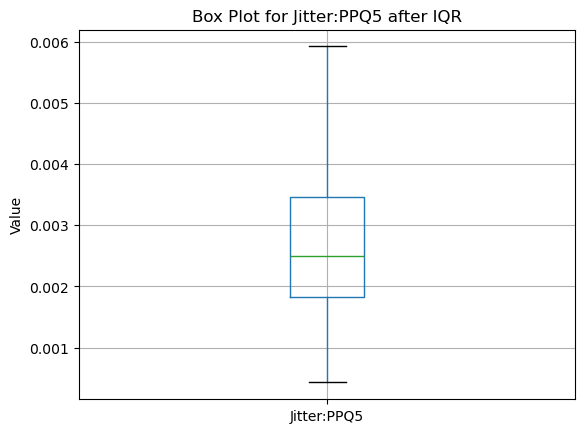

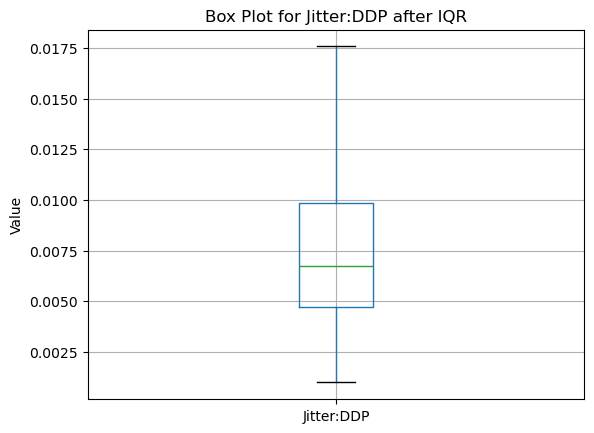

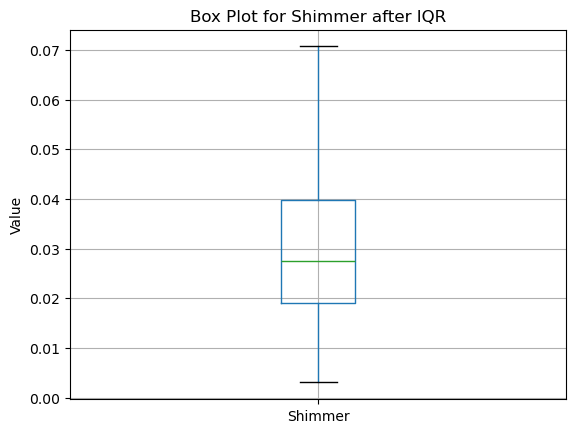

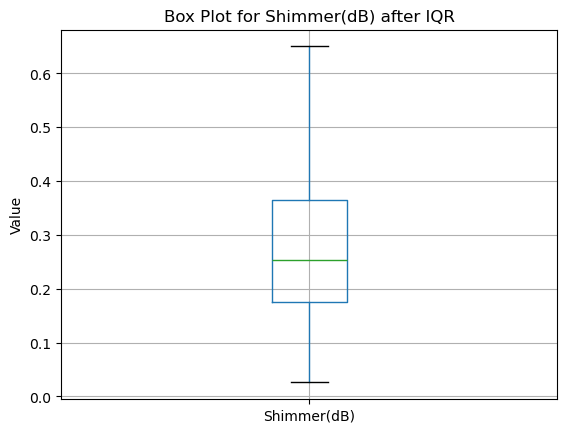

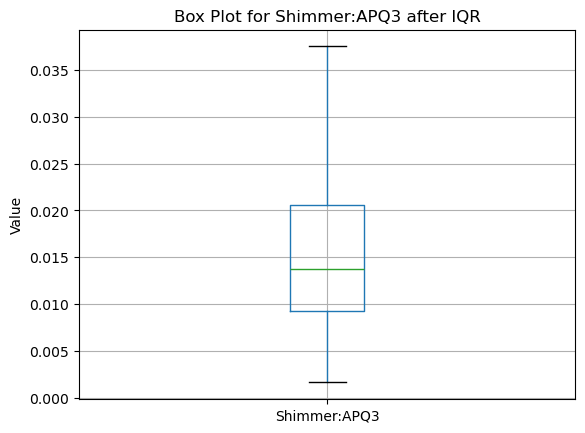

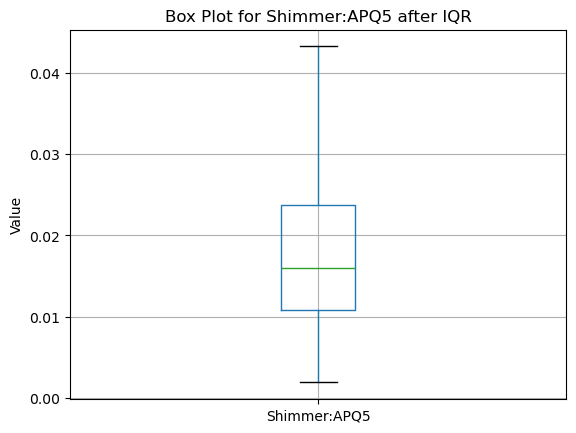

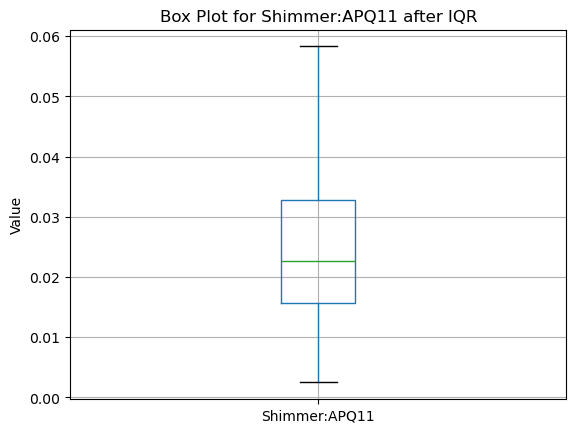

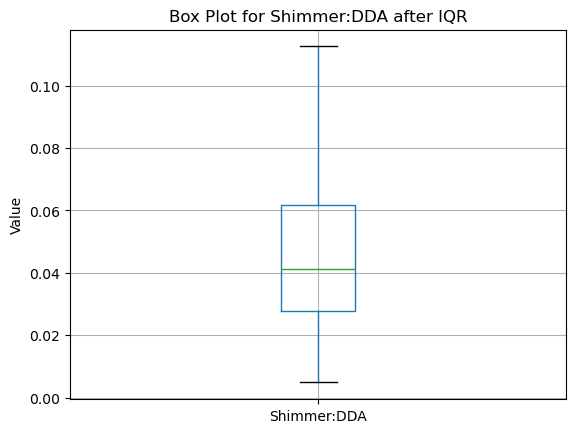

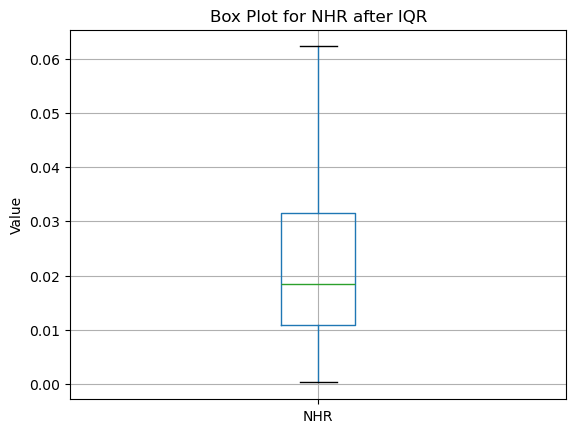

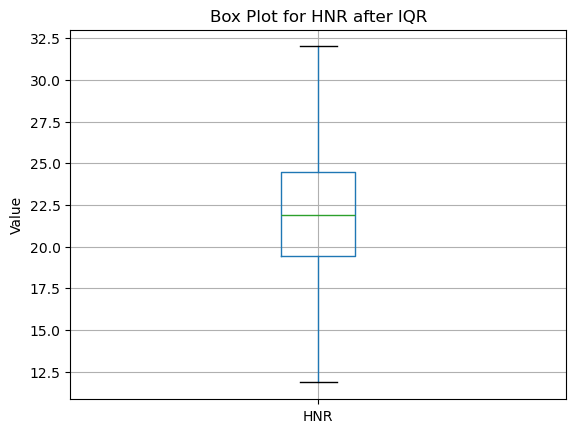

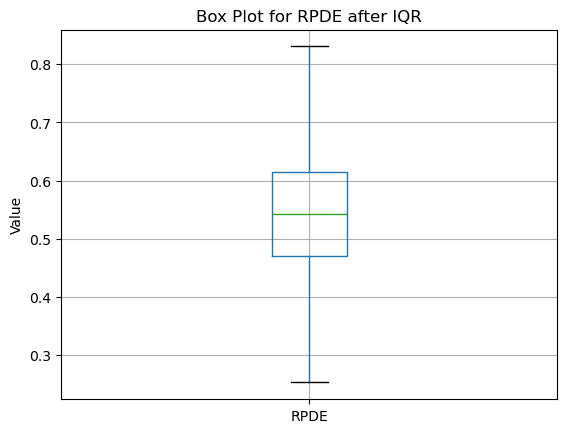

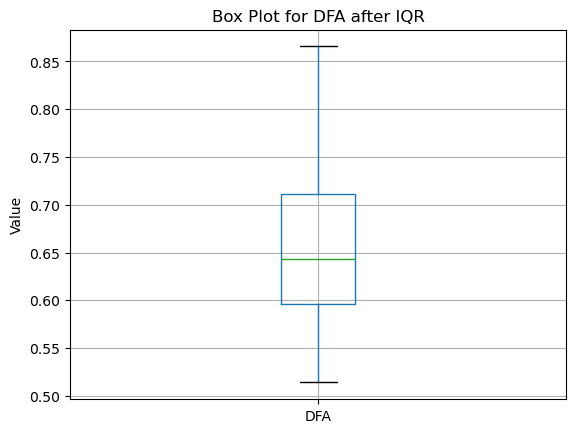

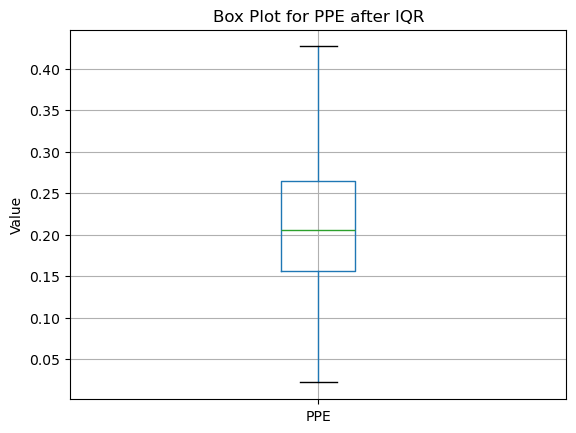

In [13]:
column = df1.select_dtypes(include=['int64','float64'])

for col in column.columns:
    plt.figure()
    column.boxplot(column = col)
    plt.title(f"Box Plot for {col} after IQR")
    plt.ylabel('Value')
    plt.show()

#### **Addressing Skewness**

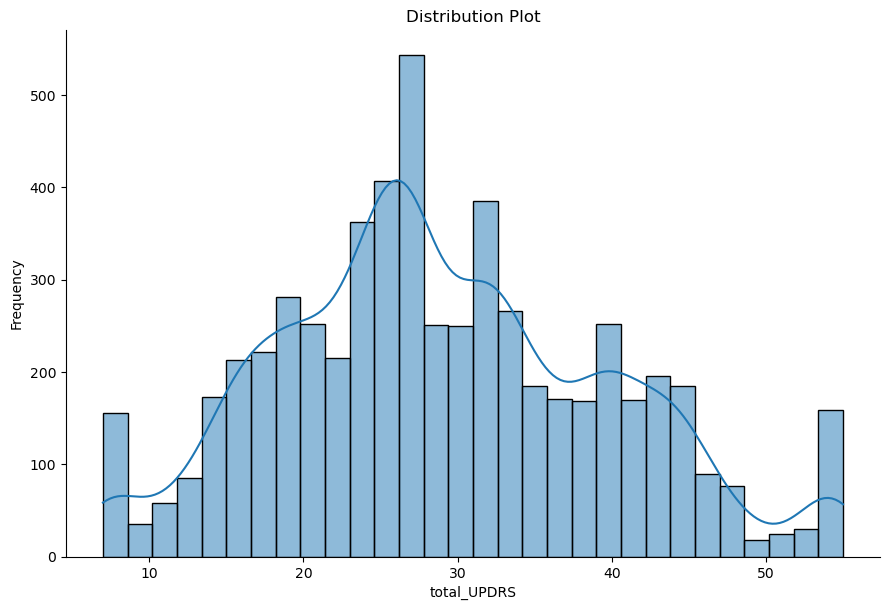

In [14]:
sns.displot(df1['total_UPDRS'], bins = 30, kde =True,height = 6, aspect = 1.5)
plt.title('Distribution Plot')
plt.xlabel('total_UPDRS')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Skewness for all the numerical features

numerical_features = df1.select_dtypes(include = ['int64','float64']).columns
print('\nSkewness of all the featres:\n')
print(df[numerical_features].skew())


Skewness of all the featres:

subject          0.002996
age             -0.330871
sex              0.782873
test_time        0.077720
motor_UPDRS      0.075248
total_UPDRS      0.271053
Jitter(%)        0.927021
Jitter(Abs)      0.969298
Jitter:RAP       0.974388
Jitter:PPQ5      0.904777
Jitter:DDP       0.975986
Shimmer          0.933559
Shimmer(dB)      0.940616
Shimmer:APQ3     0.952671
Shimmer:APQ5     0.951635
Shimmer:APQ11    0.929062
Shimmer:DDA      0.953310
NHR              1.027165
HNR             -0.230434
RPDE            -0.078092
DFA              0.282078
PPE              0.632170
dtype: float64


In [16]:
skewness = df1[numerical_features].apply(lambda x: skew(x))
skewed_feature = skewness[(skewness > 0.5)|(skewness < -0.5)].index
print("\nHighly Skewed Features:\n\n", skewness[skewed_feature])


Highly Skewed Features:

 sex              0.782674
Jitter(%)        0.926785
Jitter(Abs)      0.969051
Jitter:RAP       0.974139
Jitter:PPQ5      0.904546
Jitter:DDP       0.975737
Shimmer          0.933321
Shimmer(dB)      0.940376
Shimmer:APQ3     0.952428
Shimmer:APQ5     0.951392
Shimmer:APQ11    0.928825
Shimmer:DDA      0.953066
NHR              1.026902
PPE              0.632009
dtype: float64


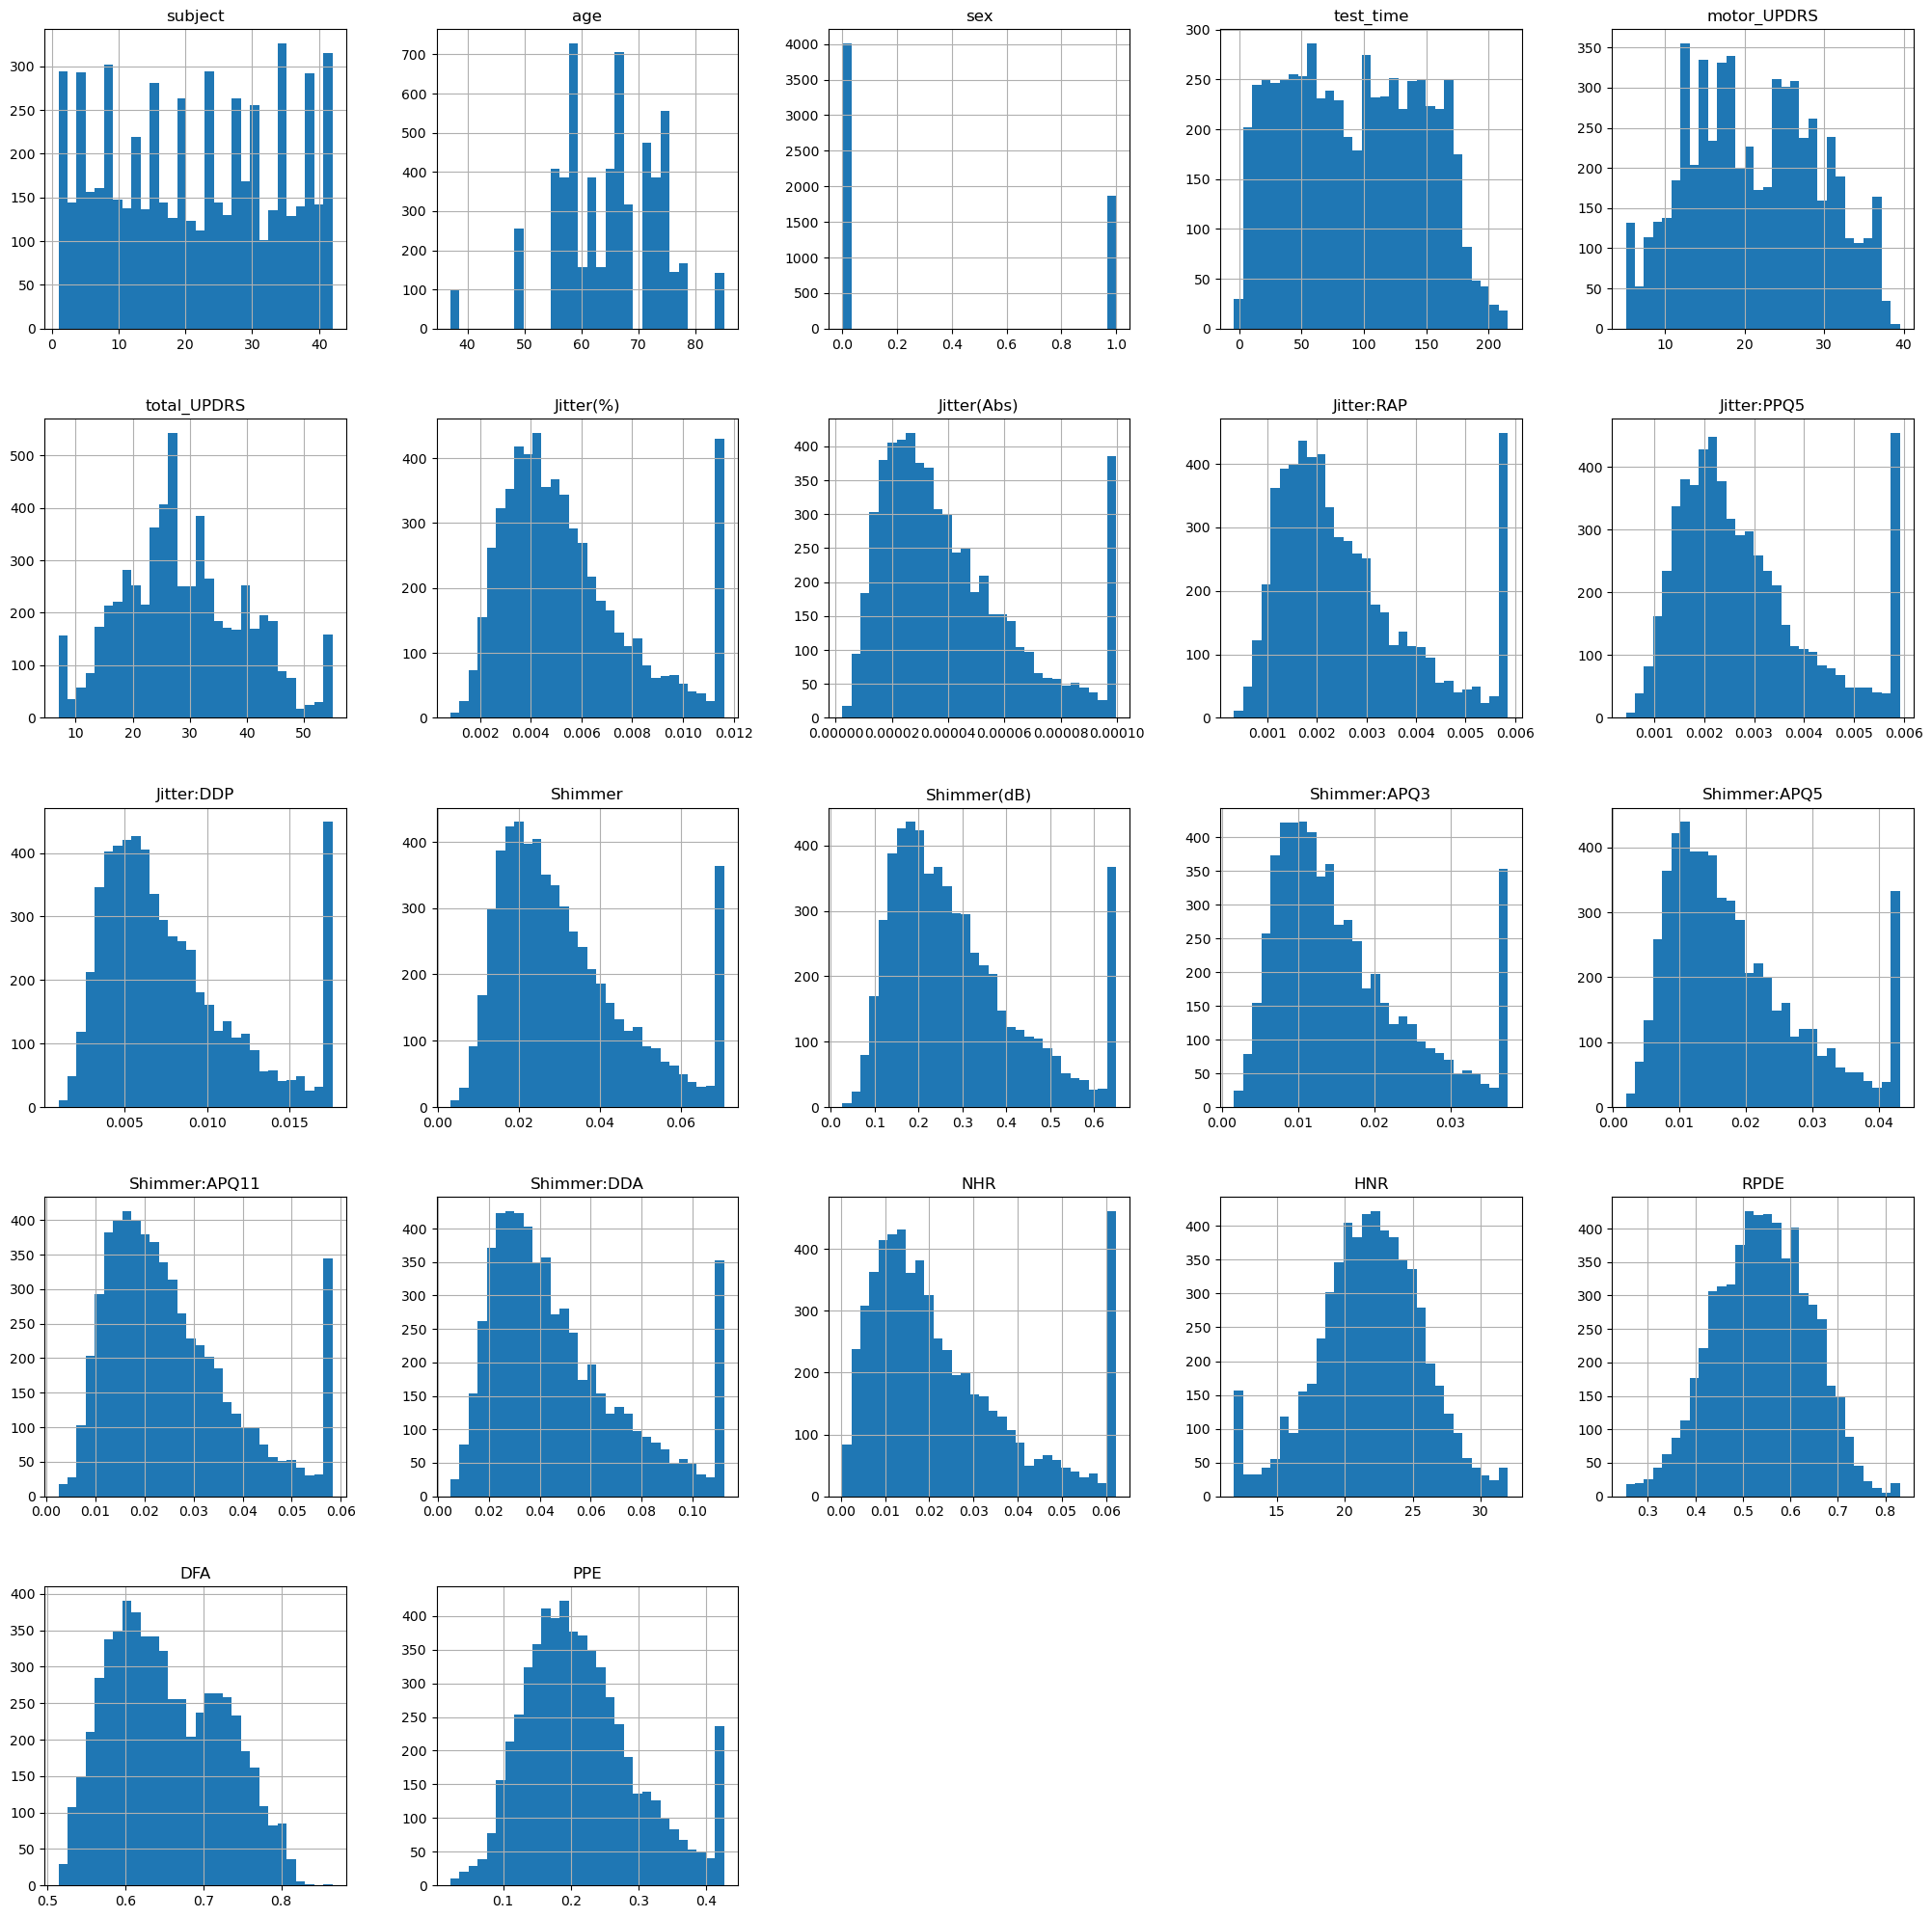

In [17]:
# ploting Histogram before transformation
df1.hist(figsize=(25,25),bins = 30)
plt.show()

#### **Handling Skewness**

In [18]:
# Applying Yoe-Johnson transformation
pt = PowerTransformer(method = 'yeo-johnson')
df1[skewed_feature] = pt.fit_transform(df1[skewed_feature])

In [19]:
# Checking Skewness after transformation
print("Skewness after transformation\n",df1[skewed_feature].skew())

Skewness after transformation
 sex              0.782873
Jitter(%)        0.125591
Jitter(Abs)      0.156529
Jitter:RAP       0.158487
Jitter:PPQ5      0.127752
Jitter:DDP       0.157408
Shimmer          0.132519
Shimmer(dB)      0.097386
Shimmer:APQ3     0.147297
Shimmer:APQ5     0.142903
Shimmer:APQ11    0.121439
Shimmer:DDA      0.140728
NHR              0.186340
PPE              0.021928
dtype: float64


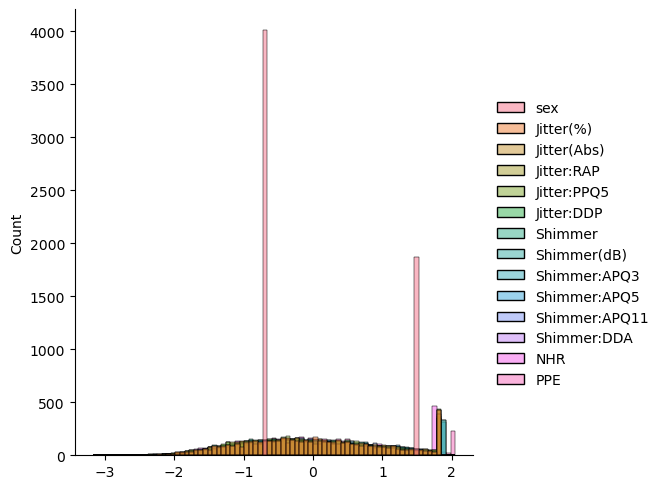

In [20]:
sns.displot(df1[skewed_feature])

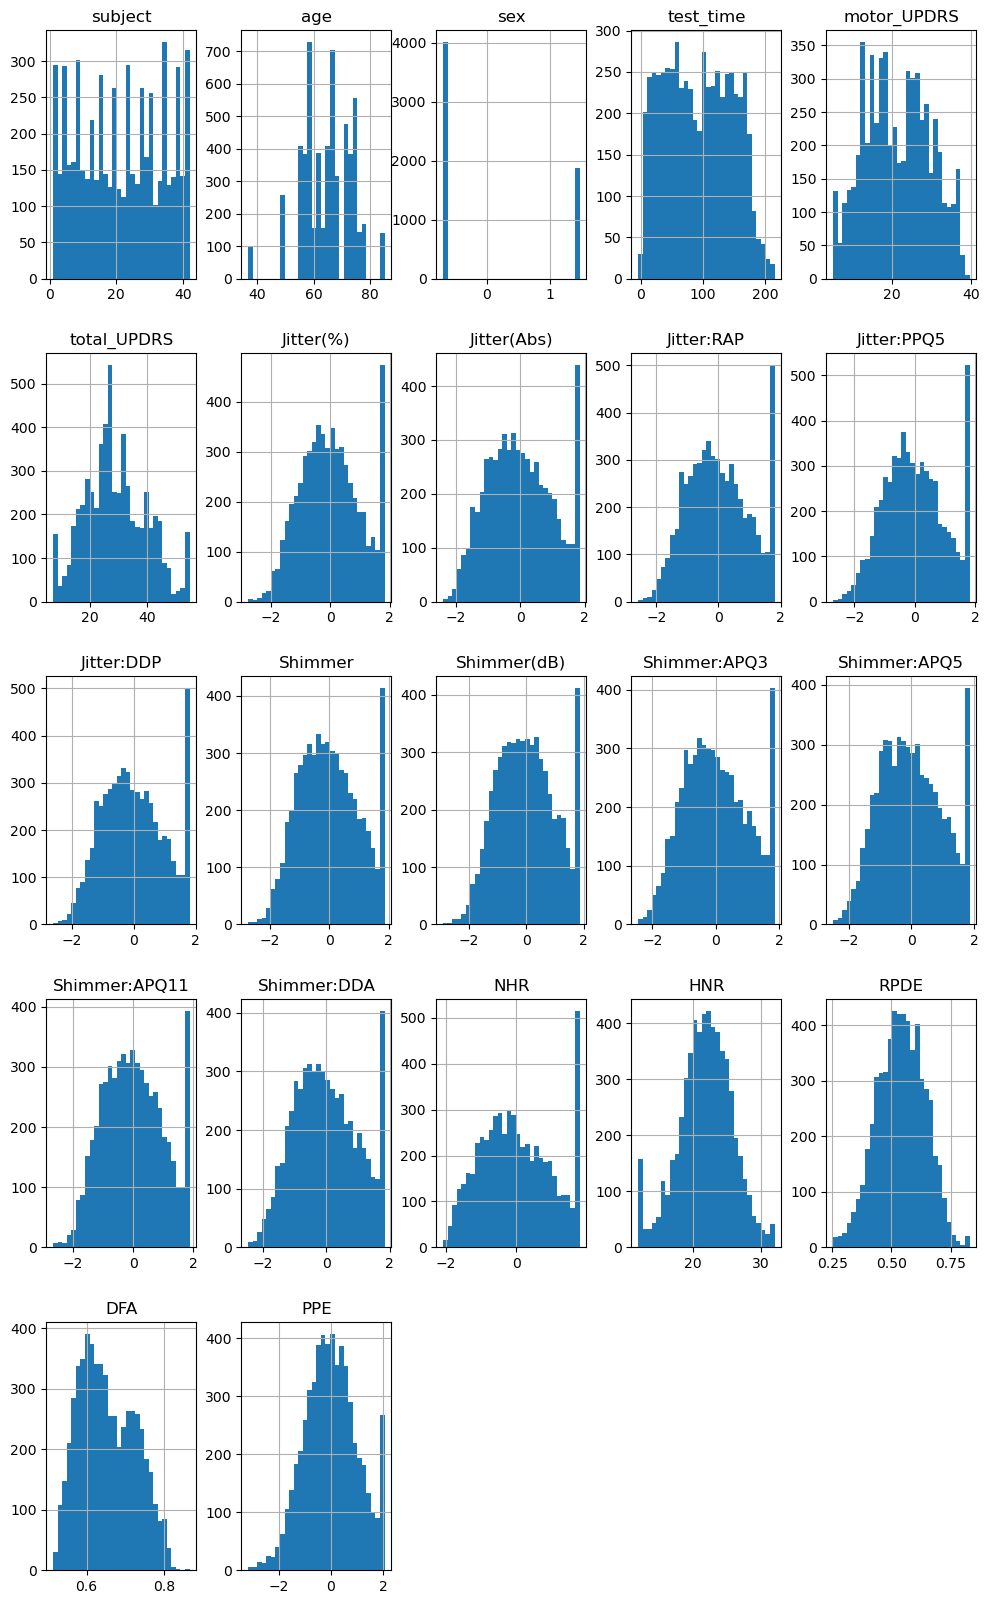

In [21]:
# Plot histograms after transformed features
df1.hist(figsize=(12, 20), bins=30)
plt.show()

## **Exploratory Data Analysis**

Text(0.5, 1.0, 'Kernel Density Estimation of Features ')

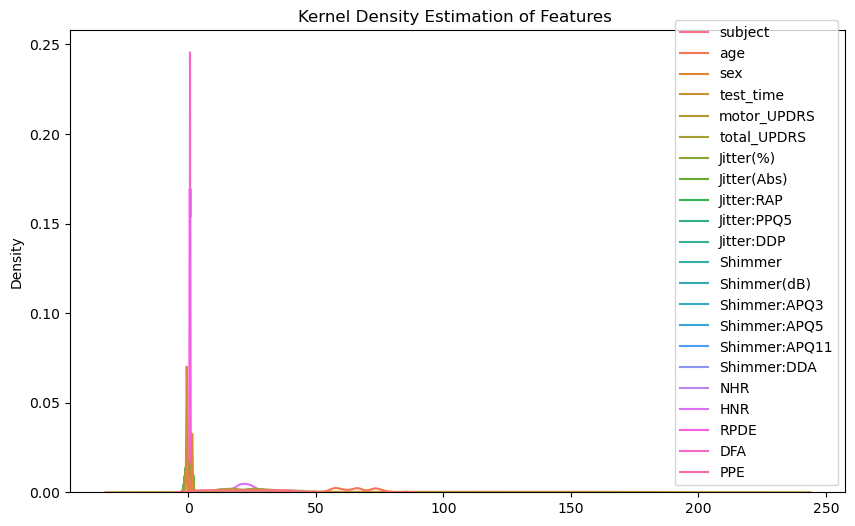

In [22]:
plt.figure(figsize=(10,6))
sns.kdeplot(df1)
plt.title('Kernel Density Estimation of Features ')

Text(0.5, 1.0, 'Kernel Density Estimation of total_UPDRS')

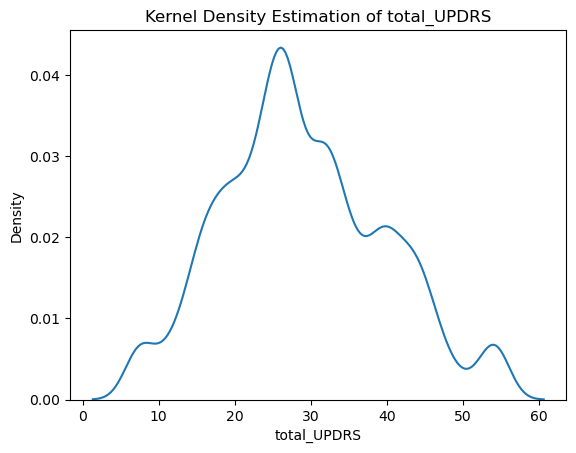

In [23]:
# Kernel Density Estimation
sns.kdeplot(df1['total_UPDRS'])
plt.title('Kernel Density Estimation of total_UPDRS')

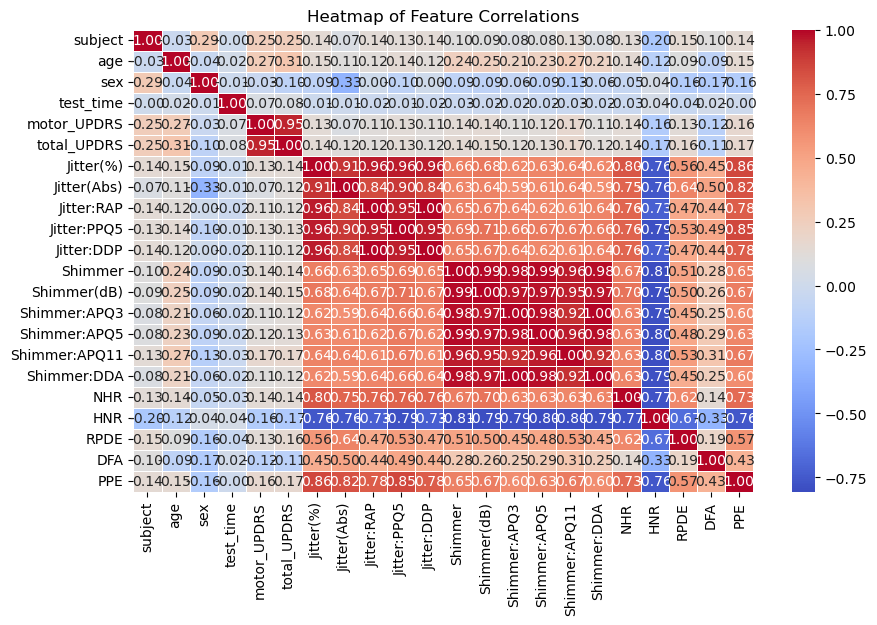

In [24]:
#  Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(), annot =True, cmap = 'coolwarm',fmt='.2f',  linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

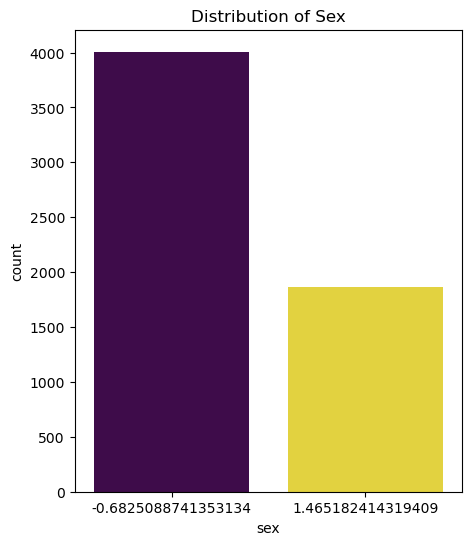

In [25]:
# Count Plot of Sex
plt.figure(figsize=(5,6))
sns.countplot(x ='sex', data=df1,  hue='sex', legend=False, palette='viridis')
plt.title("Distribution of Sex")
plt.show()

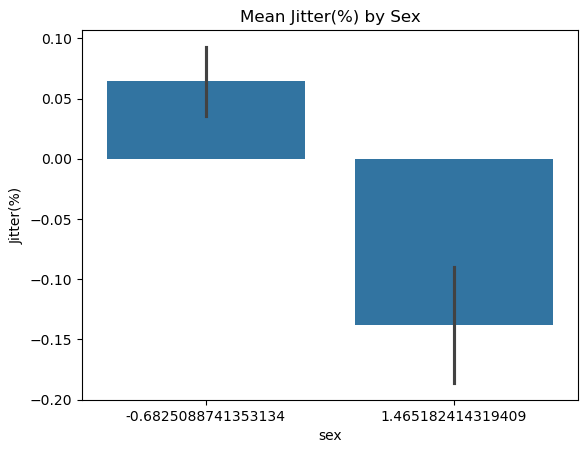

In [26]:
# Bar plot for mean value of 'Jitter(%)' by 'sex'
sns.barplot(x='sex', y='Jitter(%)', data=df1)
plt.title('Mean Jitter(%) by Sex')
plt.show()

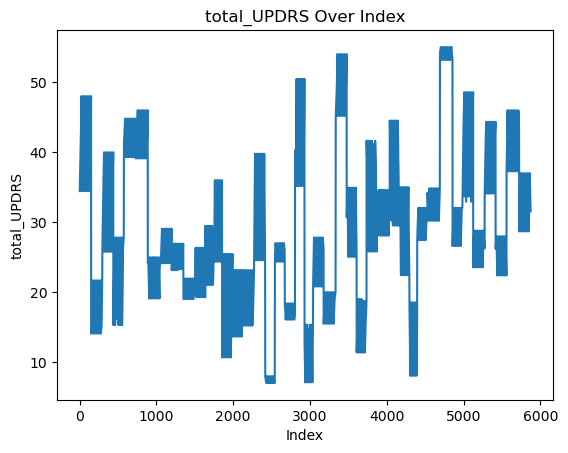

In [27]:
# Line plot for 'Jitter(%)' over index (assuming data is ordered by time or sequence)
sns.lineplot(x=df1.index, y=df1['total_UPDRS'])
plt.title('total_UPDRS Over Index')
plt.xlabel('Index')
plt.ylabel('total_UPDRS')
plt.show()

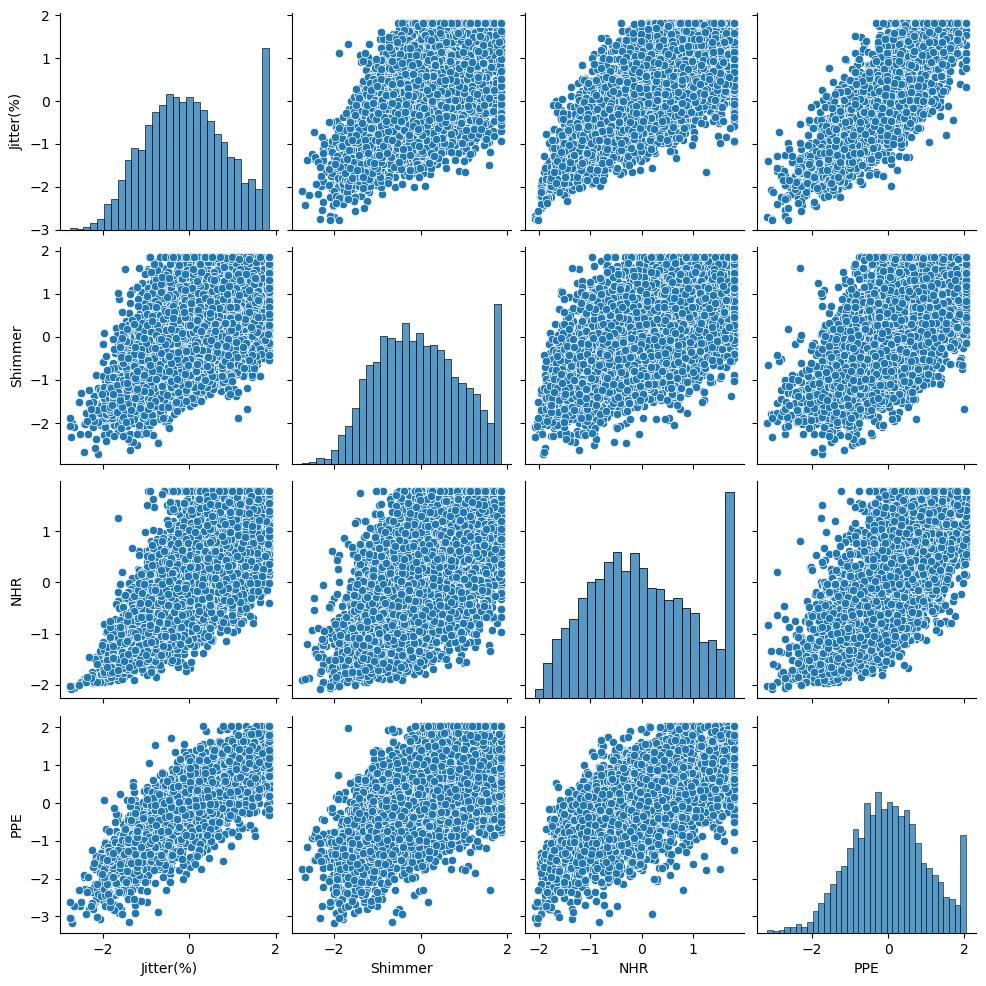

In [28]:
# Pair plot for selected features
sns.pairplot(df1[['Jitter(%)', 'Shimmer', 'NHR', 'PPE']])
plt.show()

## **Feature Selection**

In [29]:
X = df1.drop('total_UPDRS', axis =1)
y = df1['total_UPDRS']

In [30]:
selector = SelectKBest(score_func = f_regression, k =10)

X_new = selector.fit_transform(X,y)

selected_features = X.columns[selector.get_support()]

# get score for each features
feature_names = X.columns
scores = selector.scores_

feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'Score' : scores
}).sort_values(by = 'Score', ascending =False)
print(feature_scores)

# Get the name of selected features
X_selected_features = feature_names[selector.get_support()].tolist()
print(f"\nSelected Features: {X_selected_features}")

          Feature         Score
4     motor_UPDRS  51283.572424
1             age    621.375110
0         subject    403.816773
17            HNR    177.417247
14  Shimmer:APQ11    177.151575
20            PPE    169.482748
18           RPDE    147.121676
11    Shimmer(dB)    130.439658
10        Shimmer    122.913507
5       Jitter(%)    115.982574
16            NHR    115.306739
8     Jitter:PPQ5    107.752374
13   Shimmer:APQ5    104.835973
15    Shimmer:DDA     89.822501
12   Shimmer:APQ3     89.811659
6     Jitter(Abs)     82.415291
9      Jitter:DDP     81.022170
7      Jitter:RAP     80.926896
19            DFA     76.610378
2             sex     55.272949
3       test_time     33.456937

Selected Features: ['subject', 'age', 'motor_UPDRS', 'Jitter(%)', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ11', 'HNR', 'RPDE', 'PPE']


In [31]:
X_selected = X[X_selected_features]

## **Split Data into Training and Testing Sets**

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.2, random_state = 42)

In [33]:
# Output the shapes of the new training and testing sets 
print("Training set shape (features):", X_train.shape) 
print("Test set shape (features):", X_test.shape) 
print("Training set shape (target):", y_train.shape) 
print("Test set shape (target):", y_test.shape)

Training set shape (features): (4700, 10)
Test set shape (features): (1175, 10)
Training set shape (target): (4700,)
Test set shape (target): (1175,)


### *Phase :-2*

## **Feature Scaling:**

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

## **Build the ML Model:**

In [35]:
models = {
    '1. Linear Regression' : LinearRegression(),
    '2. Decision Tree Regressor' : DecisionTreeRegressor(),
    '3. Random Forest Regressor' : RandomForestRegressor(),
    '4. Gradient Boosting Regressor' : GradientBoostingRegressor(),
    '5. Support Vector Regressor' : SVR(),
    '6. MLP Regressor' : MLPRegressor(),
    '7. Lasso Regression' : Lasso(),
    '8. AdaBoost Regressor' : AdaBoostRegressor()
}

## **Model Evaluation:**

In [36]:
results={}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results[model_name] = {
    'MSE' : mse,
    'MAE' :mae,
    'R2 Score' : r2,
    'RMSE' :rmse
    }

results_df = pd.DataFrame(results).T
print(results_df)

                                      MSE       MAE  R2 Score      RMSE
1. Linear Regression            10.677184  2.446473  0.903647  3.267596
2. Decision Tree Regressor       3.382421  0.840782  0.969476  1.839136
3. Random Forest Regressor       2.172414  0.820643  0.980396  1.473911
4. Gradient Boosting Regressor   4.906567  1.377442  0.955722  2.215077
5. Support Vector Regressor      8.177198  1.953246  0.926207  2.859580
6. MLP Regressor                 5.675538  1.765472  0.948783  2.382339
7. Lasso Regression             11.958161  2.596310  0.892087  3.458057
8. AdaBoost Regressor            9.076437  2.404937  0.918092  3.012713


##### **Best Model**

In [37]:
best_model = results_df['R2 Score'].idxmax()
print(f'The best Model based on R2 Score is:\n {best_model}')
print(results_df.loc[best_model])

The best Model based on R2 Score is:
 3. Random Forest Regressor
MSE         2.172414
MAE         0.820643
R2 Score    0.980396
RMSE        1.473911
Name: 3. Random Forest Regressor, dtype: float64


### *Phase :-3*

## **Hyperparameter Tuning:**

In [38]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [39]:
# Initialize the Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error',verbose =1, n_jobs=-1)

In [40]:
# Fit the Grid Search to the data
grid_search.fit(X_train_scaled, y_train)

best_param = grid_search.best_params_
best_score = grid_search.best_score_
# Get the best parameters and score
print(f"Best Parameters: {best_param}")
print(f"Best Cross-Validation MSE Score: {-best_score}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation MSE Score: 1.0589150516632158


In [41]:
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)
# Predict on the test data
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
# test_r2= r2(y_test,y_test_pred)
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")

Test MSE: 2.3841409209956614
Test MAE: 2.3841409209956614
Test R2: 0.9784850153957871
Test RMSE: 1.5440663590000467


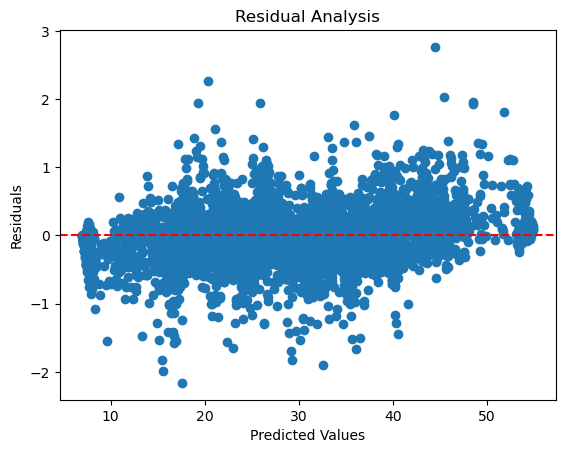

In [42]:
#Evaluating Model Performance with Residual Analysis
# Predicting values  
y_train_pred = best_model.predict(X_train_scaled)  
residuals = y_train - y_train_pred  

# Plotting residuals  
plt.scatter(y_train_pred, residuals)  
plt.axhline(y=0, color='r', linestyle='--')  
plt.xlabel('Predicted Values')  
plt.ylabel('Residuals')  
plt.title('Residual Analysis')  
plt.show()  

In [72]:
# Cross-validate the model  
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')  
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

Cross-Validation MSE: 1.0589150516632158


## **Pipeline Creation**

In [73]:
X = df1.drop(['total_UPDRS'], axis=1)
y = df1['total_UPDRS']

In [74]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler()),
    ('regressor' , RandomForestRegressor(
        n_estimators=50,              # Best number of estimators from GridSearchCV
        min_samples_split=5,          # Best min_samples_split from GridSearchCV
        min_samples_leaf=2,            # Best min_samples_leaf from GridSearchCV
        max_depth=10,                  # Best max_depth from GridSearchCV
        random_state=42                # Ensure reproducibility
    ))
])

pipeline.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=2,
                                       min_samples_split=5, n_estimators=50,
                                       random_state=42))])

## **Saving the Model:**

In [76]:
# Save the entire pipeline
joblib.dump(pipeline,'random_forest_pipeline.joblib')

['random_forest_pipeline.joblib']

## **Test with Unseen Data:**

In [77]:
# Load the saved pipeline
loaded_pipeline = joblib.load('random_forest_pipeline.joblib')

In [83]:
unseen_data = pd.read_csv('unseen.csv')
unseen_data.head()

,subject,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,89.638,31.309,40.412,0.00190,0.000009,0.00084,0.00086,...,0.082,0.00409,0.00444,0.00750,0.01227,0.002273,30.701,0.42609,0.54059,0.089143
1,1,72,0,96.637,31.776,41.034,0.00488,0.000026,0.00265,0.00251,...,0.448,0.02688,0.02876,0.04052,0.08064,0.013138,23.136,0.46322,0.57274,0.194230
2,1,72,0,103.640,32.243,41.657,0.00449,0.000026,0.00213,0.00199,...,0.177,0.00650,0.00706,0.00809,0.01951,0.034340,26.027,0.51021,0.53674,0.216370
3,1,72,0,25.647,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.332770
4,1,72,0,33.642,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.193610


In [84]:
# spliting X and y
X_unseen = unseen_data.drop('total_UPDRS', axis =1)
y_unseen = unseen_data['total_UPDRS']

In [85]:
# Predict on unseen data
y_pred_unseen = loaded_pipeline.predict(X_unseen)

In [86]:
# Evaluate on unseen data
mse_unseen = mean_squared_error(y_unseen, y_pred_unseen)
mae_unseen = mean_absolute_error(y_unseen, y_pred_unseen)
r2_unseen = r2_score(y_unseen, y_pred_unseen)
rmse_unseen = np.sqrt(mse_unseen)

print(f"Unseen Data MSE: {mse_unseen}")
print(f"Unseen Data MAE: {mae_unseen}")
print(f"Unseen Data R2: {r2_unseen}")
print(f"Unseen Data RMSE: {rmse_unseen}")

Unseen Data MSE: 0.6702924009098479
Unseen Data MAE: 0.4538370522995452
Unseen Data R2: 0.9899076271001758
Unseen Data RMSE: 0.8187138699874627


In [87]:
# Save the predictions for the unseen data
unseen_data['Predicted_total_UPDRS'] = y_pred_unseen
unseen_data.to_csv('unseen_predictions.csv', index=False)

print("Predictions saved to 'unseen_predictions.csv'.")

Predictions saved to 'unseen_predictions.csv'.


In [88]:
predicted_df = pd.read_csv('unseen_predictions.csv')
predicted_df.head()

,subject,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,Predicted_total_UPDRS
0,1,72,0,89.638,31.309,40.412,0.00190,0.000009,0.00084,0.00086,...,0.00409,0.00444,0.00750,0.01227,0.002273,30.701,0.42609,0.54059,0.089143,40.642574
1,1,72,0,96.637,31.776,41.034,0.00488,0.000026,0.00265,0.00251,...,0.02688,0.02876,0.04052,0.08064,0.013138,23.136,0.46322,0.57274,0.194230,40.932424
2,1,72,0,103.640,32.243,41.657,0.00449,0.000026,0.00213,0.00199,...,0.00650,0.00706,0.00809,0.01951,0.034340,26.027,0.51021,0.53674,0.216370,41.891460
3,1,72,0,25.647,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.332770,37.450557
4,1,72,0,33.642,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.193610,37.574736


In [96]:
actual_vs_prediction =unseen_data[['total_UPDRS', 'Predicted_total_UPDRS']]
actual_vs_prediction.head(20)

,total_UPDRS,Predicted_total_UPDRS
0,40.412,40.642574
1,41.034,40.932424
2,41.657,41.891460
3,35.810,37.450557
4,36.375,37.574736
5,36.870,37.558560
6,37.363,37.735088
7,37.857,37.735088
8,38.353,38.833437
9,38.849,38.879271
